# Linear Regr

Нужно спрогнозировать сумму годовы расходов

## Imports

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Описание данных



* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

Создадим таблицу из набора данных и исследуем её

In [5]:
df=pd.read_csv('Ecommerce Customers')

In [6]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [30]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Исследуем что и как влияет на параметр 	"Yearly Amount Spent"

<AxesSubplot:>

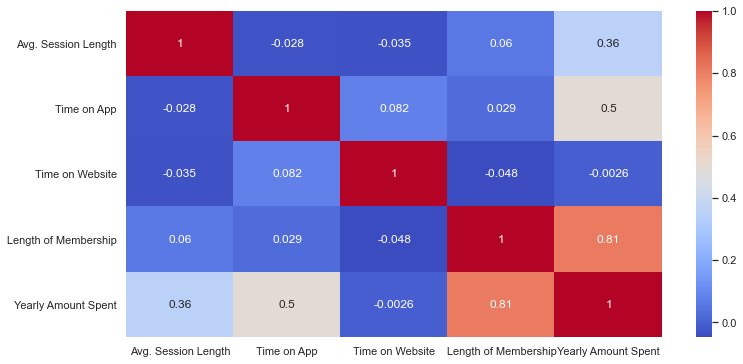

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

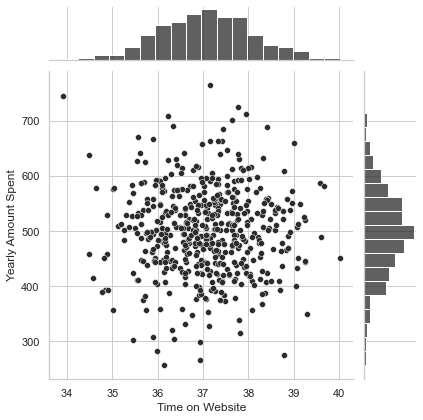

In [10]:
sns.set_theme(style='whitegrid',palette='Greys_r')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

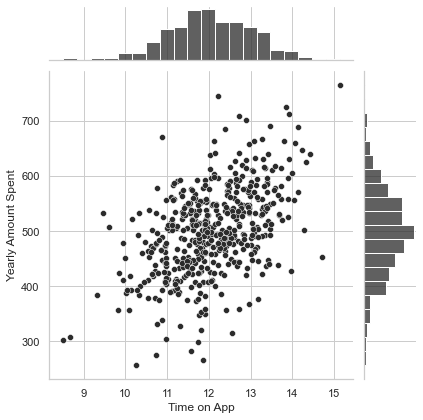

In [11]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

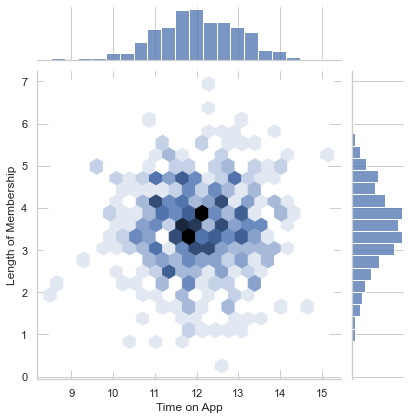

In [12]:
sns.set_theme(style='whitegrid',palette='deep')
sns.jointplot(x='Time on App',y='Length of Membership',data=df,kind='hex')

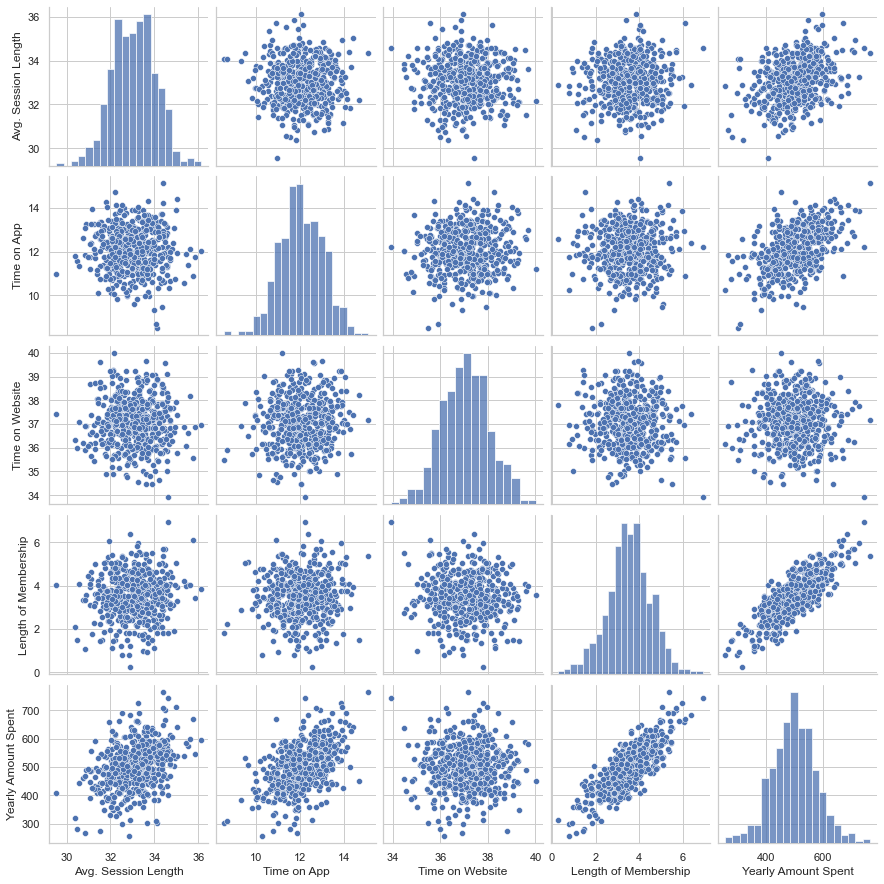

In [13]:
sns.set_theme(style='whitegrid',palette='deep')
sns.pairplot(data=df)

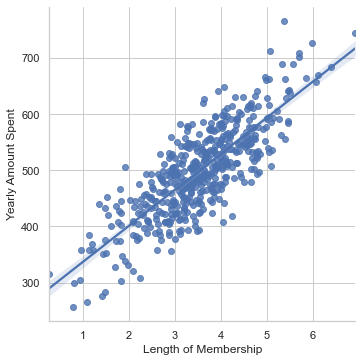

In [14]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

## Подготовим данные для обучения и тестирования



In [15]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [16]:
X=df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [17]:
y=df['Yearly Amount Spent']

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Обучим модель



In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm=LinearRegression()

In [22]:
lm.fit(X_train, y_train)

LinearRegression()

**Выведем коэффициенты**

In [23]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Прогнозирование


In [24]:
lm.predict(X_test)

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

** Посмотрим отличие реальных и спрогнозированных данных наглядно **

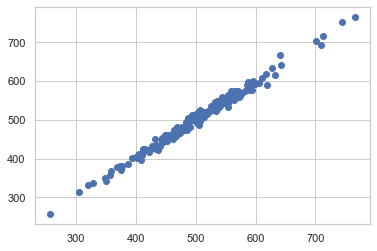

In [25]:
plt.scatter(y_test,lm.predict(X_test))

## Оценка модели

In [26]:
from sklearn import metrics


In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, lm.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, lm.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test))))

MAE: 7.22814865343082
MSE: 79.81305165097419
RMSE: 8.93381506697862


c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

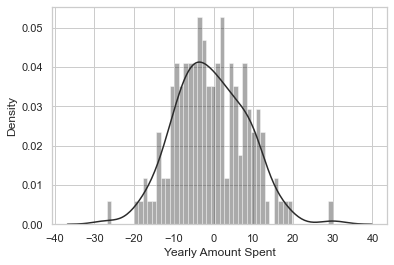

In [60]:
sns.distplot((y_test-lm.predict(X_test)),bins=50)

(array([1., 0., 0., 0., 0., 0., 1., 1., 2., 1., 1., 4., 2., 2., 6., 7., 6.,
        7., 7., 7., 9., 8., 6., 6., 7., 9., 2., 7., 6., 3., 7., 5., 4., 5.,
        4., 1., 0., 2., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-26.95573072, -25.81664466, -24.67755861, -23.53847256,
        -22.3993865 , -21.26030045, -20.1212144 , -18.98212835,
        -17.84304229, -16.70395624, -15.56487019, -14.42578414,
        -13.28669808, -12.14761203, -11.00852598,  -9.86943992,
         -8.73035387,  -7.59126782,  -6.45218177,  -5.31309571,
         -4.17400966,  -3.03492361,  -1.89583755,  -0.7567515 ,
          0.38233455,   1.5214206 ,   2.66050666,   3.79959271,
          4.93867876,   6.07776481,   7.21685087,   8.35593692,
          9.49502297,  10.63410903,  11.77319508,  12.91228113,
         14.05136718,  15.19045324,  16.32953929,  17.46862534,
         18.6077114 ,  19.74679745,  20.8858835 ,  22.02496955,
         23.16405561,  24.30314166,  25.44222771,  26.58131376,
      

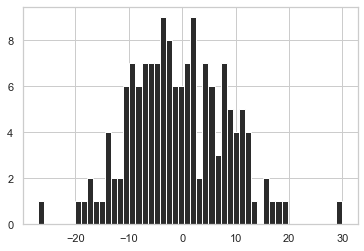

In [63]:
plt.hist((y_test-lm.predict(X_test)),bins=50)

In [64]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


условная единица проведенная в приложении приносит $38.590159 при остальных параметрах не изменяемых. Аналогично с другими параметрами

## Great Job!

